In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import functions as asdf
# A Speedy and Detailed Functions

In [2]:
imgPos = r'E:\GithubProjects\HIDDEN\ImageFromVideo\tests\frame.png'
img = cv.imread(imgPos)

True

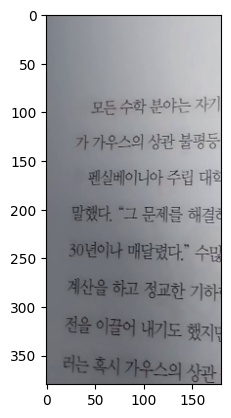

In [3]:
asdf.imshow(img)

In [4]:
clearImage = asdf.getClearImage_1(img)

True

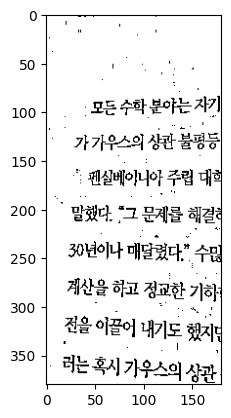

In [5]:
asdf.imshow(clearImage)

In [6]:
maskImage = asdf.getMaskImage_2(clearImage)

True

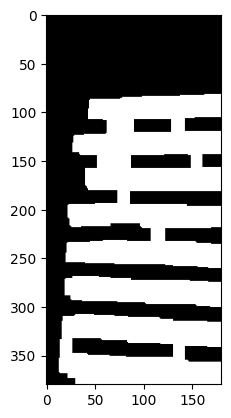

In [7]:
asdf.imshow(maskImage)

In [8]:
clearImage2 = asdf.getMaskPlusClearImage_3(clearImage, maskImage)

True

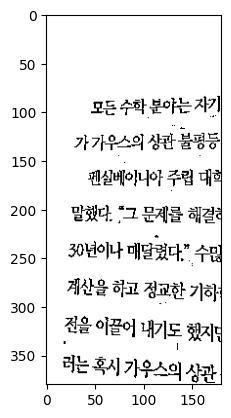

In [9]:
asdf.imshow(clearImage2)

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

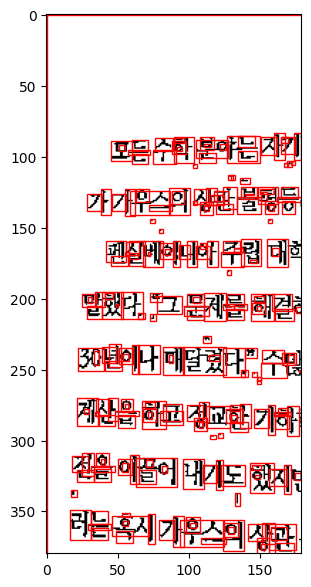

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(cv.cvtColor(clearImage2, cv.COLOR_BGR2RGB))
contours, hierarchy = cv.findContours(clearImage2.astype(np.uint8),cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
 
for contour in contours:
	x, y, width, height = cv.boundingRect(contour)
	# cv.rectangle(clearImage2,(x,y),(x + width,y + height),(0,0,250),2)
	rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
	ax.add_patch(rect)

In [12]:
from pandas import value_counts, DataFrame

def getTextClearedImage(img : np.ndarray, areaMin : int = 50, showImage : bool = False) -> np.ndarray:
	rectData = []
	maxHeight, maxWidth = np.shape(img)[:2]
	newImage = np.zeros(np.shape(img))
	newImage.fill(255)

	areas = []
	if showImage:
		fig, ax = plt.subplots(1, 3, figsize=(10, 7))
		ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
	contours, hierarchy = cv.findContours(img.astype(np.uint8),cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
	
	for contour in contours:
		x, y, width, height = cv.boundingRect(contour)
		area = width * height
		if area < maxWidth * maxHeight * 0.9:
			areas.append(area)
		if area > areaMin and area < maxWidth * maxHeight * 0.9:
			newImage[y : y + height, x: x + width] = img[y : y + height, x: x + width]
			rectData.append(((int(x+width/2), int(y+height/2)), (x, y),(width, height)))
			# listRect.append((x, y, width, height))
			# listArea.append(width * height)
			
			if showImage:
				rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
				ax[0].add_patch(rect)
	if showImage:
		ax[1].imshow(cv.cvtColor(np.uint8(newImage), cv.COLOR_GRAY2RGB))

		areas = np.array(areas)
		areas = np.around(areas / 20) * 20
		areas = value_counts(areas)
		areas = DataFrame(areas).sort_index()
		ax[2].plot(areas)
		ax[2].set_xlabel(f"Max : {areas.max()}")
	return rectData, newImage.astype('uint8')

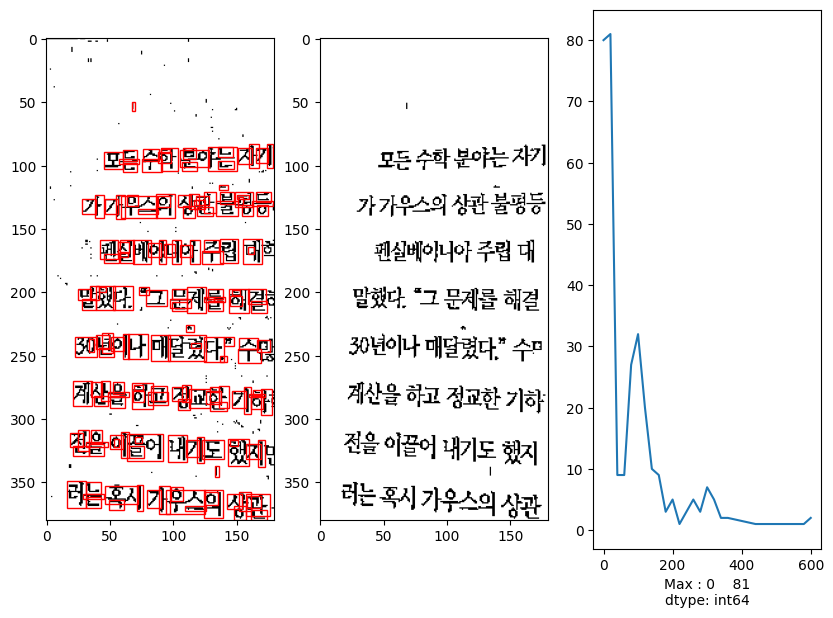

In [13]:
rectData1, clearImage2 = getTextClearedImage(clearImage, 20, True)

In [14]:
def imshow_G2R(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_GRAY2BGR))

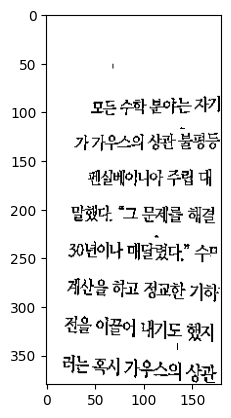

In [15]:
imshow_G2R(clearImage2)

'모드수학분야는자기가가우스의싱관불평등괜심베이니아주림대말했다.“그문제를해결30년이나매달렸다”수ㅁ계산을히고정묘한기하정음이끌어내기도했지러는혹시가우스의상감'

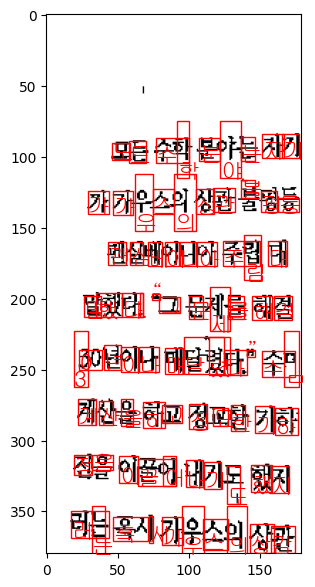

In [16]:
asdf.showTesseractedImage(clearImage2, ('-l kor --oem 3 --psm 11'))

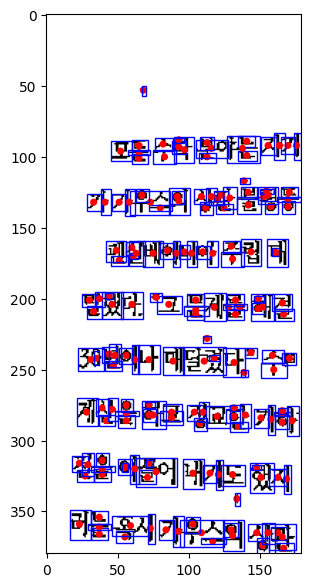

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(cv.cvtColor(clearImage2, cv.COLOR_BGR2RGB))

centerPoses = []
rectSizes = []
for centerPos, leftTopPos, wh in rectData1:
	# centerPos
	centerPoses.append(centerPos)
	rectSizes.append(wh[0] * wh[1])
	ax.add_patch(patches.Circle(centerPos, 2, color='r'))
	ax.add_patch(patches.Rectangle(leftTopPos, wh[0], wh[1], linewidth=1, edgecolor='b', facecolor='none'))

In [18]:
def showValueCounts(data, multipleValue):
	temp = np.around(data / multipleValue) * multipleValue
	temp = value_counts(temp)
	temp = DataFrame(temp).sort_index()
	plt.plot(temp)
	return temp

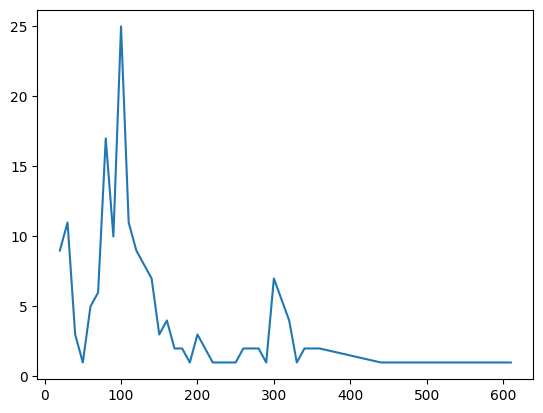

In [19]:
# 박스 크기 비교
_ = showValueCounts(np.array(rectSizes), 10)

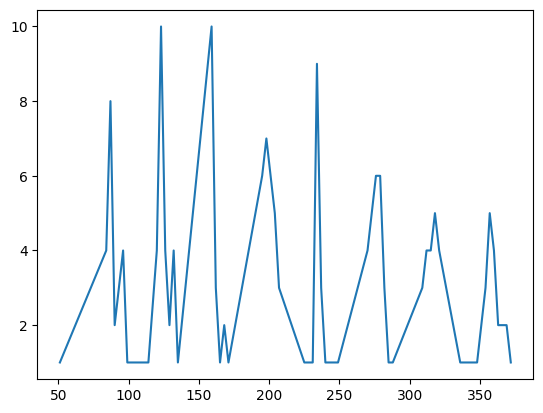

In [20]:
# y 좌표 비교
# (쓸만함)
yValues = showValueCounts(np.array([x[1] for _,x,_ in rectData1]), 3)

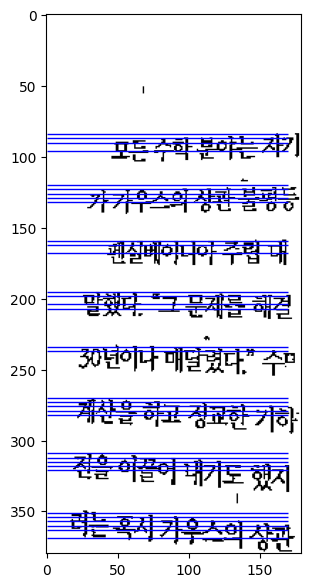

In [21]:
a=yValues>=2
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(cv.cvtColor(clearImage2, cv.COLOR_BGR2RGB))
for key, value in dict(a.to_dict()[0]).items():
    if value:
    	ax.add_patch(patches.Rectangle((0, key),170,0, linewidth=1, edgecolor='b', facecolor='none'))
    

In [22]:
clearImage2.shape

(380, 180)

In [23]:
np.array(clearImage2.shape) / 2

array([190.,  90.])

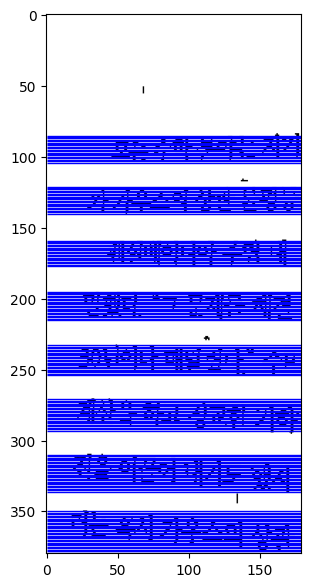

In [24]:
a = asdf.subtractIt(clearImage2, (3, 3)) < 127
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(cv.cvtColor(clearImage2, cv.COLOR_BGR2RGB))
lastValue = False
area = []
for i, y in enumerate(a):
	if sum(y) > 10:
		now = True
	else:
		now = False
	if now == True:
		ax.add_patch(patches.Rectangle((0, i),180,0, linewidth=1, edgecolor='b', facecolor='none'))
		if lastValue == False:
			area.append((i, None))
	if now == False:
		if lastValue == True:
			b = area[len(area) - 1]
			area[len(area) - 1] = (b[0], i)

	lastValue = now
b = area[len(area) - 1]
if b[1] == None:
	area[len(area) - 1] = (b[0], clearImage2.shape[0]-1)

In [25]:
area

[(85, 105),
 (121, 141),
 (159, 178),
 (195, 216),
 (233, 255),
 (271, 294),
 (310, 337),
 (350, 379)]

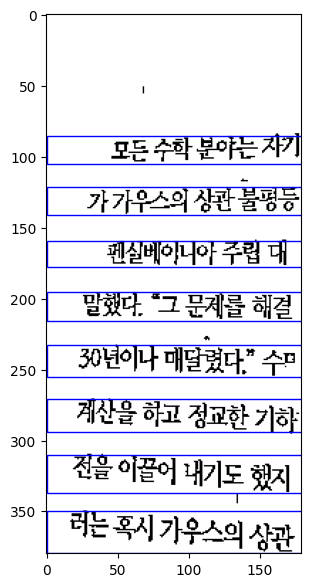

In [26]:
a = asdf.subtractIt(clearImage2, (3, 3)) < 127
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(cv.cvtColor(clearImage2, cv.COLOR_BGR2RGB))
splitedImages = []
for startY, endY in area:
	splitedImages.append(cv.cvtColor(clearImage2[startY:endY,:], cv.COLOR_GRAY2RGB))
	ax.add_patch(patches.Rectangle((0, startY),180,endY - startY, linewidth=1, edgecolor='b', facecolor='none'))

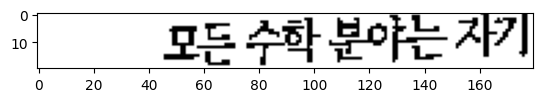

In [27]:
plt.imshow(splitedImages[0])

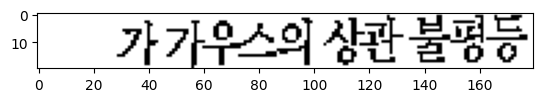

In [28]:
plt.imshow(splitedImages[1])

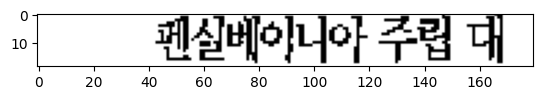

In [29]:
plt.imshow(splitedImages[2])

ㅠㅠ 이거제

모든수학분야는자기
가가우스의상판불펑등
펜실베이니악주럽대
말했다."그문제를해결
30년이나매달다”수ㅁ
계산을하고정교한기하
진을이끝어내기도했지
미는옥시가우스의상과


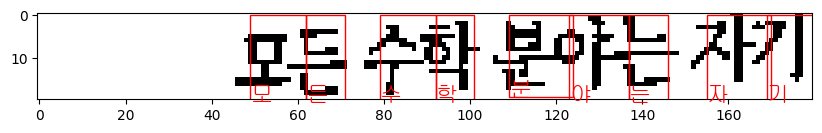

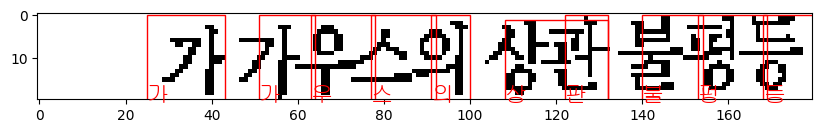

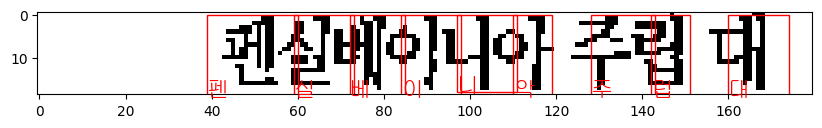

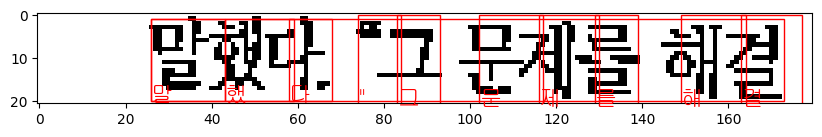

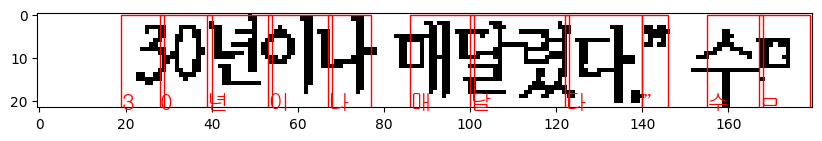

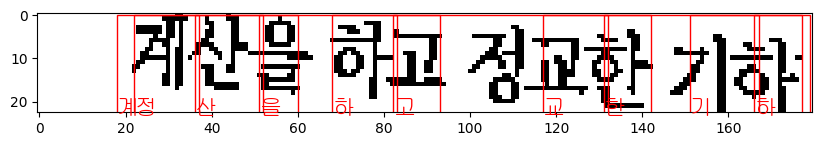

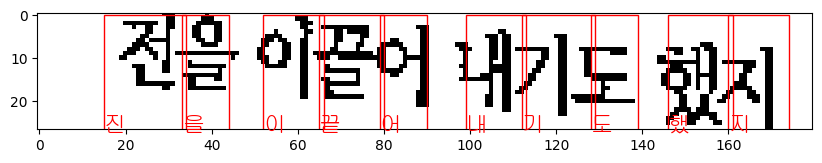

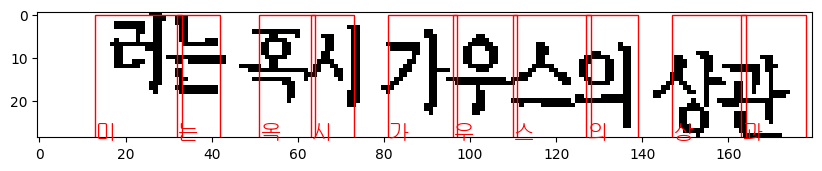

In [30]:
for img in splitedImages:
	txt = asdf.showTesseractedImage(img, ('-l kor --oem 3 --psm 10'))
	print(txt)